In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the requests library.
import requests

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

# Import the API key.
from config import weather_api_key
from citipy import citipy
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key



In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-86.92371426668015 -6.165606604051504
-21.570725325564396 90.10442300499278
-61.81178073817575 -113.18741556300215
12.23470358682404 -79.33411722972927
76.45688507515342 155.2710353687262
-37.28486527913687 118.76959638397557
3.2060136696070316 -52.58690319881512
-32.77962131880318 -46.71745815048092
-33.657185871167066 -90.52142194116651
-33.57020233830597 54.39089245023217
44.07779411768101 -13.797796835243616
-14.190449122688179 148.10815274499646
-28.85306781566208 -61.917850493791235
0.18777216384182793 137.89062157267585
-15.260253342749692 -21.983459335601452
-24.487115800052592 57.749176709285564
71.99762475642382 -74.74680303493997
42.46755986631379 -133.3976685169734
-51.43157942792337 -20.929851499245245
-18.689351450222873 37.20030027665496
30.953917441928112 54.32237158595515
86.42652352183188 122.64822807241956
-47.79320642649477 113.48791290520438
25.605950165619717 -141.1884812164294
80.46350089186797 -106.26216013352698
68.38698664546783 -23.026772887028898
-30.4025778

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

626

In [6]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | hermanus
Processing Record 2 of Set 13 | bengkulu
Processing Record 3 of Set 13 | punta arenas
Processing Record 4 of Set 13 | san andres
Processing Record 5 of Set 13 | srednekolymsk
Processing Record 6 of Set 13 | albany
Processing Record 7 of Set 13 | camopi
Processing Record 8 of Set 13 | cidreira
Processing Record 9 of Set 13 | lebu
Processing Record 10 of Set 13 | taolanaro
City not found. Skipping...
Processing Record 11 of Set 13 | muros
Processing Record 12 of Set 13 | cairns
Processing Record 13 of Set 13 | reconquista
Processing Record 14 of Set 13 | biak
Processing Record 15 of Set 13 | georgetown
Processing Record 16 of Set 13 | saint-philippe
Processing Record 17 of Set 13 | clyde river
Processing Record 18 of Set 13 | north bend
Processing Record 19 of Set 13 | arraial do cabo
Processing Record 20 of Set 13 | quelimane
Processing Record 21 of Set 13 | mehriz
Processing Record 22 o

Processing Record 33 of Set 16 | hofn
Processing Record 34 of Set 16 | miri
Processing Record 35 of Set 16 | doba
Processing Record 36 of Set 16 | las cruces
Processing Record 37 of Set 16 | bluff
Processing Record 38 of Set 16 | norman wells
Processing Record 39 of Set 16 | sao gabriel da cachoeira
Processing Record 40 of Set 16 | pathein
Processing Record 41 of Set 16 | saskylakh
Processing Record 42 of Set 16 | sisimiut
Processing Record 43 of Set 16 | general roca
Processing Record 44 of Set 16 | beloha
Processing Record 45 of Set 16 | tezu
Processing Record 46 of Set 16 | iberia
Processing Record 47 of Set 16 | vardo
Processing Record 48 of Set 16 | carnarvon
Processing Record 49 of Set 16 | spalene porici
Processing Record 50 of Set 16 | naron
Processing Record 1 of Set 17 | agadir
Processing Record 2 of Set 17 | mentok
City not found. Skipping...
Processing Record 3 of Set 17 | half moon bay
Processing Record 4 of Set 17 | chuy
Processing Record 5 of Set 17 | monroe
Processing R

Processing Record 16 of Set 20 | himatnagar
Processing Record 17 of Set 20 | bud
Processing Record 18 of Set 20 | cravo norte
Processing Record 19 of Set 20 | xam nua
Processing Record 20 of Set 20 | karratha
Processing Record 21 of Set 20 | lingdong
Processing Record 22 of Set 20 | porto belo
Processing Record 23 of Set 20 | khorramshahr
Processing Record 24 of Set 20 | boyolangu
Processing Record 25 of Set 20 | houma
Processing Record 26 of Set 20 | lavras
Processing Record 27 of Set 20 | mikkeli
Processing Record 28 of Set 20 | ostrovnoy
Processing Record 29 of Set 20 | honiara
Processing Record 30 of Set 20 | waitati
Processing Record 31 of Set 20 | scarborough
Processing Record 32 of Set 20 | nalut
Processing Record 33 of Set 20 | lazaro cardenas
Processing Record 34 of Set 20 | batemans bay
Processing Record 35 of Set 20 | bahia blanca
Processing Record 36 of Set 20 | bambanglipuro
Processing Record 37 of Set 20 | khani
Processing Record 38 of Set 20 | borujan
City not found. Ski

Processing Record 7 of Set 24 | madimba
Processing Record 8 of Set 24 | tupiza
Processing Record 9 of Set 24 | kaseda
Processing Record 10 of Set 24 | muzquiz
City not found. Skipping...
Processing Record 11 of Set 24 | ayr
Processing Record 12 of Set 24 | billings
Processing Record 13 of Set 24 | jardim
Processing Record 14 of Set 24 | pringsewu
Processing Record 15 of Set 24 | auki
Processing Record 16 of Set 24 | grindavik
Processing Record 17 of Set 24 | lompoc
Processing Record 18 of Set 24 | huayucachi
Processing Record 19 of Set 24 | cam ranh
Processing Record 20 of Set 24 | christchurch
Processing Record 21 of Set 24 | grahamstown
Processing Record 22 of Set 24 | atar
Processing Record 23 of Set 24 | tabas
Processing Record 24 of Set 24 | nioro
Processing Record 25 of Set 24 | cockburn harbour
City not found. Skipping...
Processing Record 26 of Set 24 | nyimba
Processing Record 27 of Set 24 | ketchikan
Processing Record 28 of Set 24 | vila franca do campo
Processing Record 29 o

In [8]:
len(city_data)

575

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)

In [10]:
city_data_df = city_data_df[["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]]

In [11]:
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hermanus,ZA,2022-09-20 12:51:02,-34.4187,19.2345,72.81,61,0,10.51
1,Bengkulu,ID,2022-09-20 12:51:02,-3.8004,102.2655,76.93,88,100,3.80
2,Punta Arenas,CL,2022-09-20 12:49:42,-53.1500,-70.9167,37.51,81,75,10.36
3,San Andres,CO,2022-09-20 12:51:03,12.5847,-81.7006,80.62,83,75,6.91
4,Srednekolymsk,RU,2022-09-20 12:51:03,67.4500,153.6833,38.95,82,100,18.75


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [15]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'09/20/22'

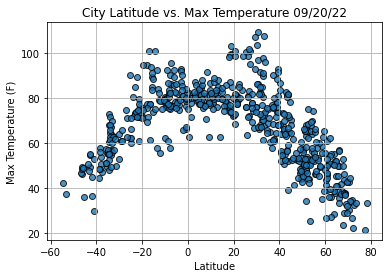

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

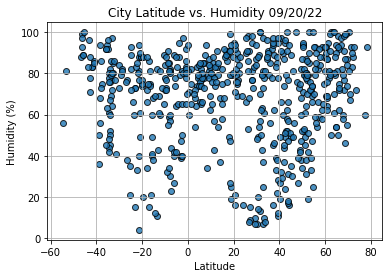

In [25]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

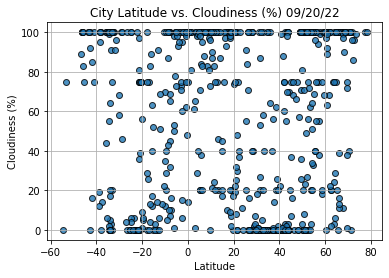

In [26]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

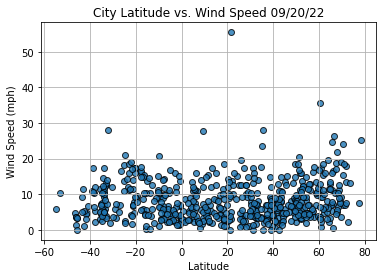

In [27]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()